<a href="https://colab.research.google.com/github/yua2307/DALTM/blob/master/WebCamRetinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4kBS3voG1SYOW0AXCz4KxjlkclQ94Z27VEAYV50eRkCckrdoMwEeA
Mounted at /content/gdrive


In [ ]:
#%cd '/content/gdrive/MyDrive/RetinaNet'

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/RetinaNet'
/content


In [ ]:
#!unzip retina_model.zip

Archive:  retina_model.zip
   creating: infer_model/
  inflating: infer_model/resnet50_csv_36.h5  
   creating: train_model/
  inflating: train_model/resnet50_csv_36.h5  


In [ ]:
!pip install keras_retinanet

     |████████████████████████████████| 71kB 2.7MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=163868 sha256=7cad3f5b7fbc1970c2b8efa939ced2f303cae49e42b1397a48a83a6af7e7224f
  Stored in directory: /root/.cache/pip/wheels/79/1d/fc/496708301dbd84bc2faa258d24d82f39fe46d9701d52287373
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=8a927247581f72e3b43fde113cb07e3fad28e8313a06aa01667fa1289e09bec3
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


No entry 0.999
Mandatory 0.998


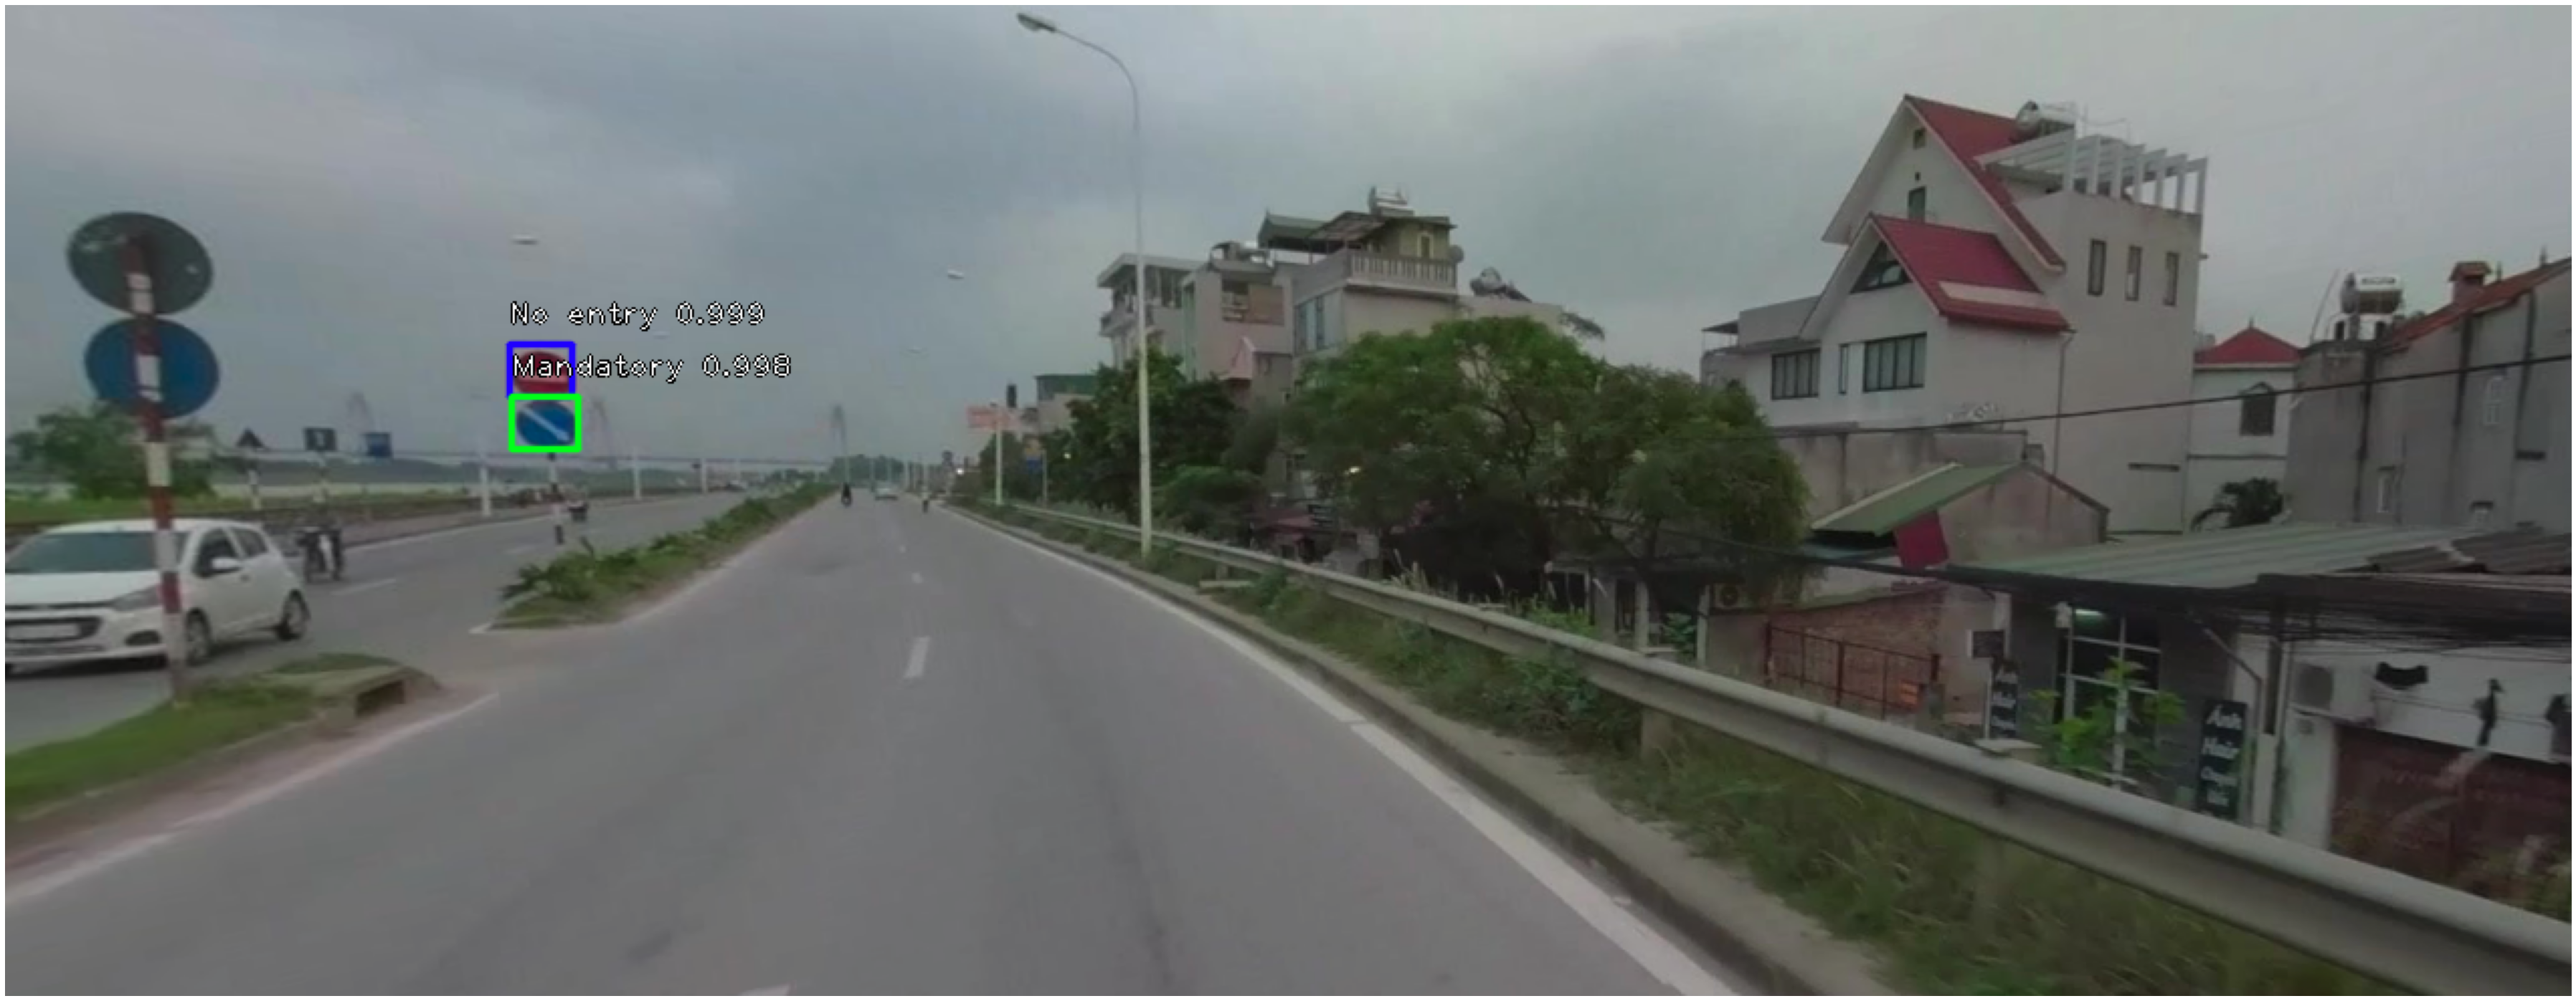

In [ ]:
#test With Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras.optimizers import Adam
# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import tensorflow as tf
model_path = os.path.join('/content/gdrive/MyDrive/RetinaNet/infer_model', 'resnet50_csv_36.h5')
 
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

# load label to names mapping for visualization purposes
labels_to_names = {
    0: "No entry",
    1: "No parking / waiting", 
    2: "No turning",
    3: "Max Speed",
    4: "Other prohibition signs",
    5: "Warning",
    6: "Mandatory"
}
 
# load image
image = read_image_bgr('/content/gdrive/MyDrive/RetinaNet/12235.png')
# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
 
# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
 
# correct for image scale
boxes /= scale
 
# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    print(caption)
    draw_caption(draw, b, caption)
 
plt.figure(figsize=(50, 50))
plt.axis('off')
plt.imshow(draw)
plt.tight_layout()
plt.show()

In [ ]:
#test With Image Path

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from google.colab.patches import cv2_imshow
from keras.models import load_model
from keras.preprocessing import image
from keras.optimizers import Adam

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import tensorflow as tf
model_path = os.path.join('/content/gdrive/MyDrive/RetinaNet/infer_model', 'resnet50_csv_36.h5')
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

# load label to names mapping for visualization purposes
labels_to_names = {
    0: "No entry",
    1: "No parking / waiting", 
    2: "No turning",
    3: "Max Speed",
    4: "Other prohibition signs",
    5: "Warning",
    6: "Mandatory"
}
 
# load image
image2 = read_image_bgr('/content/gdrive/MyDrive/RetinaNet/12235.png')
#image = cv2.imread('/content/gdrive/MyDrive/RetinaNet/12235.png')
# copy to draw on
draw = image2.copy()
img = image2.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# preprocess image for network
image2 = preprocess_image(image2)
image2, scale = resize_image(image2)

boxes, scores, labels = model.predict_on_batch(np.expand_dims(image2, axis=0))
list_img_cutted=[]
# correct for image scale
boxes /= scale
# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
    color = label_color(label)
    
    b = box.astype(int)
    c = img[b[1]:b[3]+5, b[0]:b[2]+5]

    list_img_cutted.append(c)
    print(b)
    draw_box(draw, b, color=color)
 
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    print(caption)
    draw_caption(draw, b, caption)
cv2.imwrite(img_path,cv2.cvtColor(list_img_cutted[-1], cv2.COLOR_BGR2RGB))
#plt.figure(figsize=(50, 50))
#plt.axis('off')
#plt.imshow(list_img_cutted[-1])
#plt.tight_layout()
#plt.show()

class_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42']
model = load_model('/content/gdrive/MyDrive/MiAi_Traffic_Sign_Classify/traffic_sign_model.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
test_image = image.load_img('/content/gdrive/MyDrive/RetinaNet/test_image_cutted/test1.png',target_size=(64,64,3))
test_image = image.img_to_array(test_image)
print(test_image.shape)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
print(result.max())
max_index_row = np.argmax(result, axis=1)
print(max_index_row)

[250 168 281 194]
No entry 0.999
[251 194 284 220]
Mandatory 0.998
(64, 64, 3)
[[6.7270191e-22 1.2666764e-16 7.3943260e-16 5.0036062e-19 8.2141469e-15
  1.0366557e-14 6.8823121e-16 4.3665610e-16 2.8570702e-16 5.7042055e-22
  2.5447186e-17 4.7488521e-16 1.4924191e-15 1.2365454e-09 1.5521230e-25
  6.8003167e-23 6.3885226e-24 3.8066283e-20 3.6610657e-19 3.3071424e-20
  8.4358315e-15 1.2422256e-21 5.1724489e-20 1.2764794e-16 5.3173407e-18
  1.4658178e-20 5.1554958e-17 5.2923112e-17 1.5419277e-22 1.6159119e-17
  2.3665201e-21 1.1712103e-18 1.0082772e-16 1.9491387e-14 8.8364711e-09
  5.0590811e-16 8.1683982e-12 1.6432086e-15 1.0000000e+00 3.8731028e-18
  3.7867558e-13 7.5337784e-17 2.6654444e-20]]
1.0
[38]


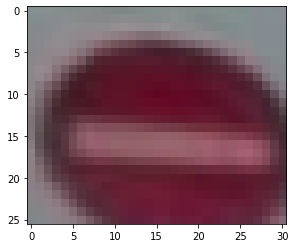

In [ ]:
plt.imshow(list_img_cutted[0])

In [ ]:
# Test With Image Resize Array

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from google.colab.patches import cv2_imshow
from keras.models import load_model
from keras.preprocessing import image


# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import tensorflow as tf
model_path = os.path.join('/content/gdrive/MyDrive/RetinaNet/infer_model', 'resnet50_csv_36.h5')
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

# load label to names mapping for visualization purposes
labels_to_names = {
    0: "No entry",
    1: "No parking / waiting", 
    2: "No turning",
    3: "Max Speed",
    4: "Other prohibition signs",
    5: "Warning",
    6: "Mandatory"
}
 
# load image
image2 = read_image_bgr('/content/gdrive/MyDrive/MiAi_Traffic_Sign_Classify/7317.png')
#image = cv2.imread('/content/gdrive/MyDrive/RetinaNet/12235.png')
# copy to draw on
draw = image2.copy()
img = image2.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# preprocess image for network
image2 = preprocess_image(image2)
image2, scale = resize_image(image2)

boxes, scores, labels = model.predict_on_batch(np.expand_dims(image2, axis=0))
list_img_cutted=[]
# correct for image scale
boxes /= scale
# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
    color = label_color(label)
    
    b = box.astype(int)
    c = img[b[1]-5:b[3]+5, b[0]-5:b[2]+5]

    list_img_cutted.append(c)
    print(b)
    draw_box(draw, b, color=color)
 
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    print(caption)
    draw_caption(draw, b, caption)

class_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42']
model = load_model('/content/gdrive/MyDrive/MiAi_Traffic_Sign_Classify/traffic_sign_model.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
for img in list_img_cutted:

  test_image = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  print(result.max())
  max_index_row = np.argmax(result, axis=1)
  print(max_index_row)
#plt.imshow(list_img_cutted[0])

[ 67 115  84 130]
Other prohibition signs 1.000
[297 106 309 115]
Warning 0.988
[71 84 87 99]
Other prohibition signs 0.968
[ 69 101  86 114]
No parking / waiting 0.870
[ 69 101  86 114]
Mandatory 0.590
0.3628996
[21]
0.9818188
[13]
0.6236633
[17]
0.9999765
[17]
0.9999765
[17]


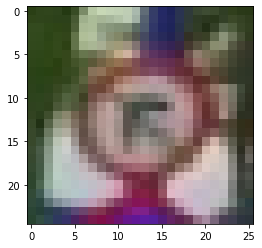

In [ ]:
#plt.imshow(draw)


plt.imshow(list_img_cutted[2])

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
from keras.preprocessing import image
class_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42']
model = load_model('/content/gdrive/MyDrive/MiAi_Traffic_Sign_Classify/traffic_sign_model.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
test_image = image.load_img('/content/gdrive/MyDrive/MiAi_Traffic_Sign_Classify/test1.png',target_size=(64,64,3))

test_image = image.img_to_array(test_image)
print(test_image.shape)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
print(result.max())
max_index_row = np.argmax(result, axis=1)
print(max_index_row)

WEB CAM CODE START FROM HERE !!!!

In [ ]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data


In [ ]:
# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
import colorsys
import random
labels_to_names = {
    0: "No entry",
    1: "No parking / waiting",
    2: "No turning",
    3: "Max Speed",
    4: "Other prohibition signs",
    5: "Warning",
    6: "Mandatory"
}
N = len(labels_to_names)
HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
RGB_tuples = list(map(lambda x: tuple(255*np.array(colorsys.hsv_to_rgb(*x))), HSV_tuples))
random.shuffle(RGB_tuples)

In [ ]:
%cd /content
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
#from keras.models import  load_model
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
 
# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Đang lấy hình ảnh...'
# initialze bounding box to empty
bbox = ''
count = 0 

# Load model Nhận diện tiền
#model_file_path = "/content/gdrive/MyDrive/weights-42-0.99.hdf5"
#vggmodel = load_model(model_file_path)

#classes = ['00000','10000','20000','50000']


model_path = os.path.join('/content/gdrive/MyDrive/RetinaNet/infer_model', 'resnet50_csv_36.h5')
 
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
 
# load label to names mapping for visualization purposes

while True:
    # Đọc ảnh trả về từ JS
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"]) #type BGR

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    
    #draw = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
 
    # preprocess image for network
    image = preprocess_image(bgr)
    image, scale = resize_image(image)
 
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
 
    # correct for image scale
    boxes /= scale
    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < 0.5:
        break
      #color = label_color(label)

      b = box.astype(int)
      #draw_box(draw, b, color=color)

      #caption = "{} {:.3f}".format(labels_to_names[label], score)
      #draw_caption(draw, b, caption)
      bbox_array = cv2.rectangle(bbox_array, (b[0], b[1]), (b[2], b[3]), RGB_tuples[label], 6)
      #bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(caption, float(score)),
                        #(left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        #color[-1], 2)
      caption = "%s: %.1f%%"%(labels_to_names[label], score*100)
      bbox_array =  cv2.putText(bbox_array, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 5)
      bbox_array=  cv2.putText(bbox_array, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)    
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

/content


<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

Detect Using Video

In [ ]:
import time
cap = cv2.VideoCapture('/content/gdrive/MyDrive/RetinaNet/test_video/test1.mp4')
counter = 0
sum_time=0
while(True):
    ret, draw = cap.read()
    if not ret:
        break
    bgr = cv2.cvtColor(draw, cv2.COLOR_RGB2BGR)
    
    # preprocess image for network
    image = preprocess_image(bgr)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    t = time.time() - start
#     print("processing time: ", t)

    # compute predicted labels and scores
 
    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < 0.5:
            continue
        b = box.astype(int)
        cv2.rectangle(draw, (b[0], b[1]), (b[2], b[3]), RGB_tuples[label], 6)
        caption = "%s: %.1f%%"%(labels_to_names[label], score*100)
        cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 5)
        cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.imwrite('/tmp/img%08d.jpg'%counter,draw)
    counter=counter+1
    sum_time+=t

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: ignored